### 1. 탐색적 데이터 분석 (Exploratory Data Analysis)

In [1]:
# 라이브러리 로드
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# 주피터 노트북 상에서 plot 보여줌
%matplotlib inline

In [4]:
# 데이터 로드
df = pd.read_csv("C:/Users/beoms/Desktop/STUDY/Naver DSP 2024/N_DSP_2024/diabetes.csv")
df.shape

(768, 9)

In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# 결측치 확인하기
df_null = df.isnull()
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# 수치 데이터에 대한 요약
df.describe(include="number")
# Glucose, BP, SkinThickness, Insulin, BMI 최솟값이 0이 될 수 없음????

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# 마지막의 outcome 은 label값

feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [15]:
# 결측치 시각화
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [20]:
# 결측치 여부를 나타내는 df 만들기
# 0값을 결측치라고 가정한다

df_null = df[cols].replace(0,np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<Axes: >

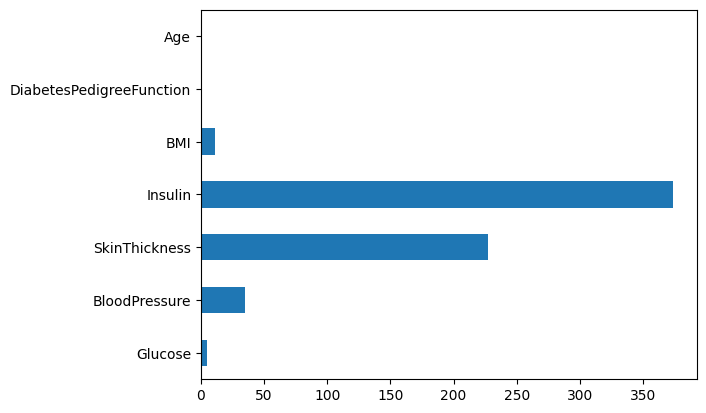

In [22]:
df_null.sum().plot.barh()
# 인슐린은 아마 0이 결측치가 아니지 않을까? 너무 많아서

In [23]:
df_null.mean()

Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
dtype: float64

<Axes: >

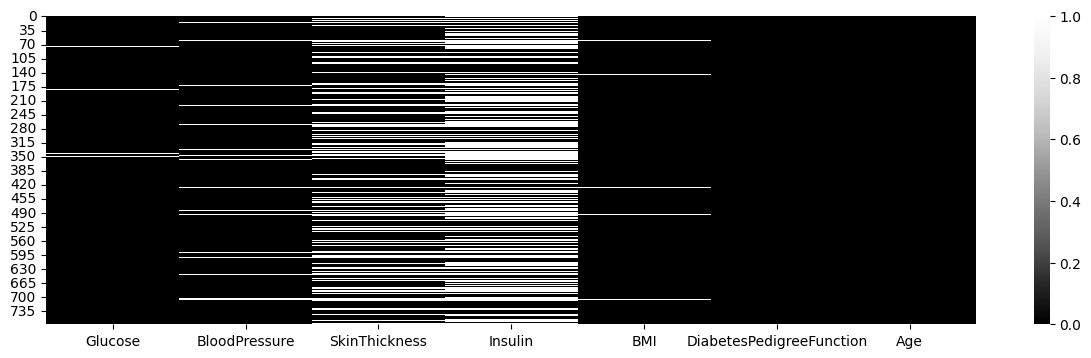

In [26]:
#결측치를 heatmap으로 시각화
# Ture=1, False=0
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap="Greys_r")

In [28]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [29]:
df["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [34]:
# 임신횟수와 당뇨병 발병 확률 비교
# groupby(인덱스값)
df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"])

# pregnancies 인덱스 없애고 번호 부여하고 싶을때
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()


<Axes: >

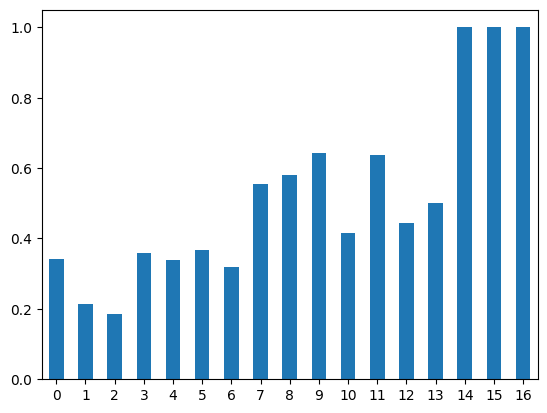

In [40]:
# 임신 확률에 따른 당뇨병 발병 비율

df_po["mean"].plot.bar(rot=0)

<Axes: xlabel='Outcome', ylabel='count'>

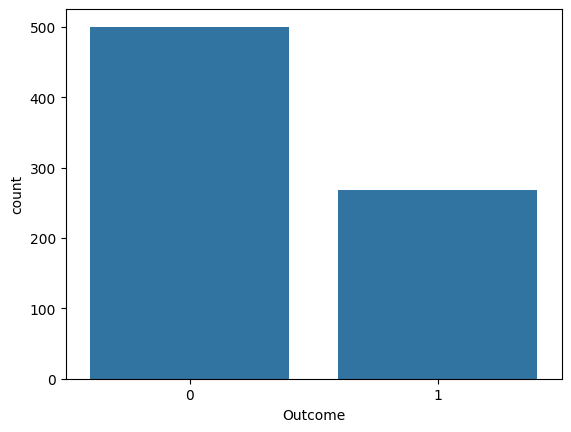

In [44]:
# countplot
# 발병 비율

sns.countplot(data=df, x="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

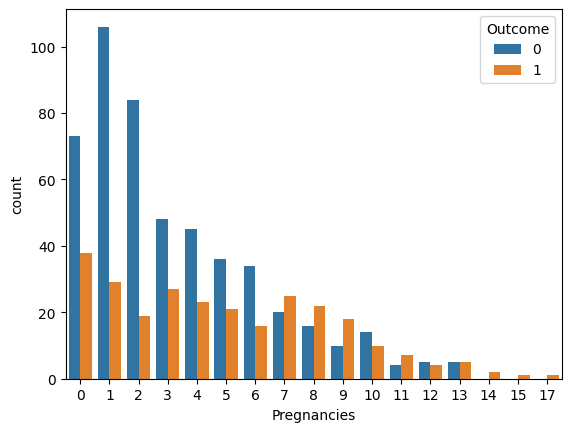

In [45]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교

sns.countplot(data=df, x="Pregnancies", hue="Outcome")
# 7th 부터 뒤집혀짐?

In [51]:
# 특정 임신 횟수 이상/이하

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

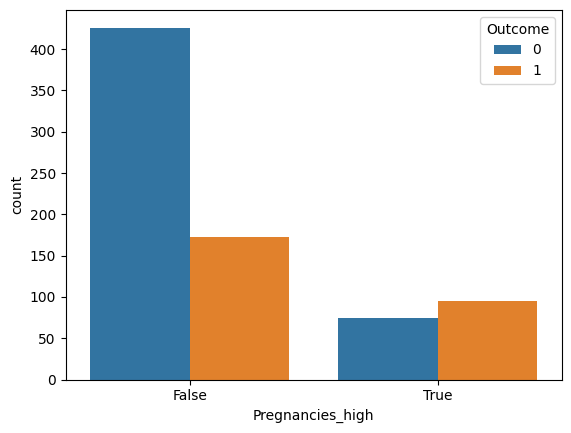

In [53]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

<Axes: xlabel='Outcome', ylabel='BMI'>

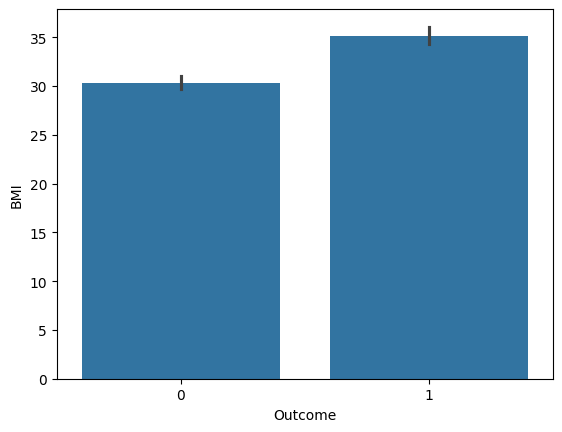

In [54]:
# Barplot
# 당뇨병 발병에 따른 BMI 수치 비교

sns.barplot(data=df, x="Outcome", y="BMI")

<Axes: xlabel='Outcome', ylabel='Glucose'>

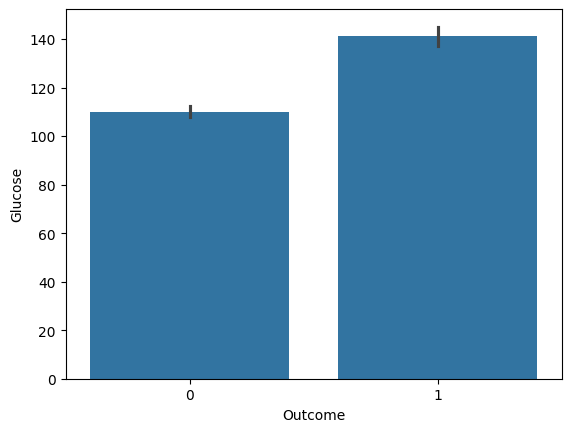

In [59]:
# 당뇨병 발벙에 따른 Glucose 수치 비교

sns.barplot(data=df, x="Outcome", y="Glucose")

C:\Users\beoms\AppData\Local\Temp\ipykernel_3128\833581962.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Pregnancies"])


<Axes: xlabel='Pregnancies', ylabel='Density'>

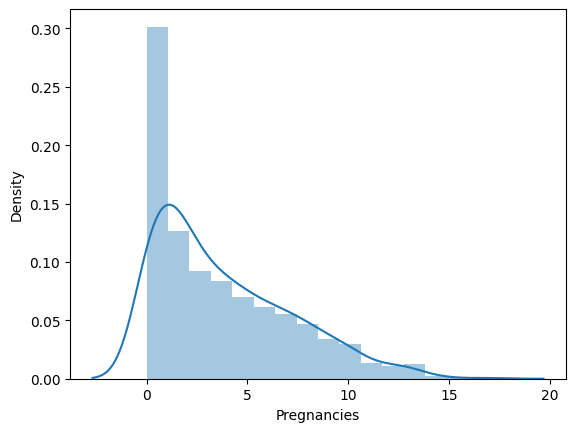

In [66]:
# distplot
sns.distplot(df["Pregnancies"])


In [72]:
# 발병하는 케이스, 발병하지 않는 케이스
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

C:\Users\beoms\AppData\Local\Temp\ipykernel_3128\2332108248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Pregnancies"])
C:\Users\beoms\AppData\Local\Temp\ipykernel_3128\2332108248.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pregnancies"])


<Axes: xlabel='Pregnancies', ylabel='Density'>

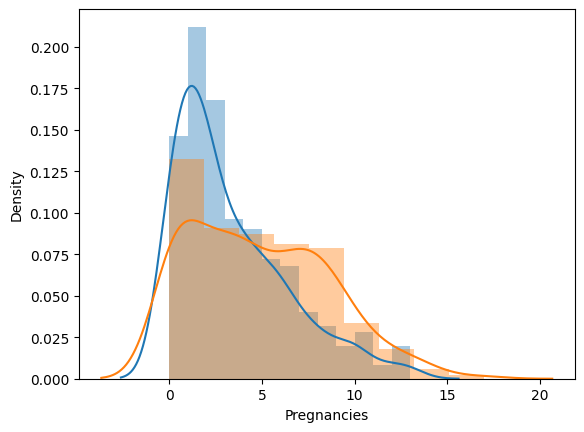

In [74]:

sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])
# 임신여부가 5가 넘어가면 발병률이 더 높아짐

C:\Users\beoms\AppData\Local\Temp\ipykernel_3128\1317364741.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Age"], rug=True)
C:\Users\beoms\AppData\Local\Temp\ipykernel_3128\1317364741.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Age"], hist=False)


<Axes: xlabel='Age', ylabel='Density'>

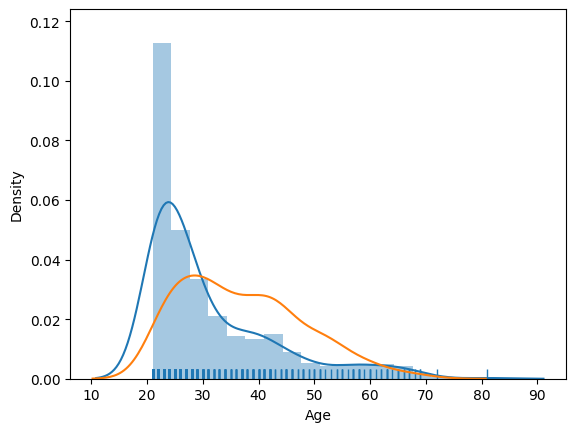

In [77]:
# 나이에 따른 발병률
sns.distplot(df_0["Age"], rug=True)
sns.distplot(df_1["Age"], hist=False)
# 30세 이후 발병률 더 높음
# hist = False 옵션이 들어가면 곡선만 그려줌

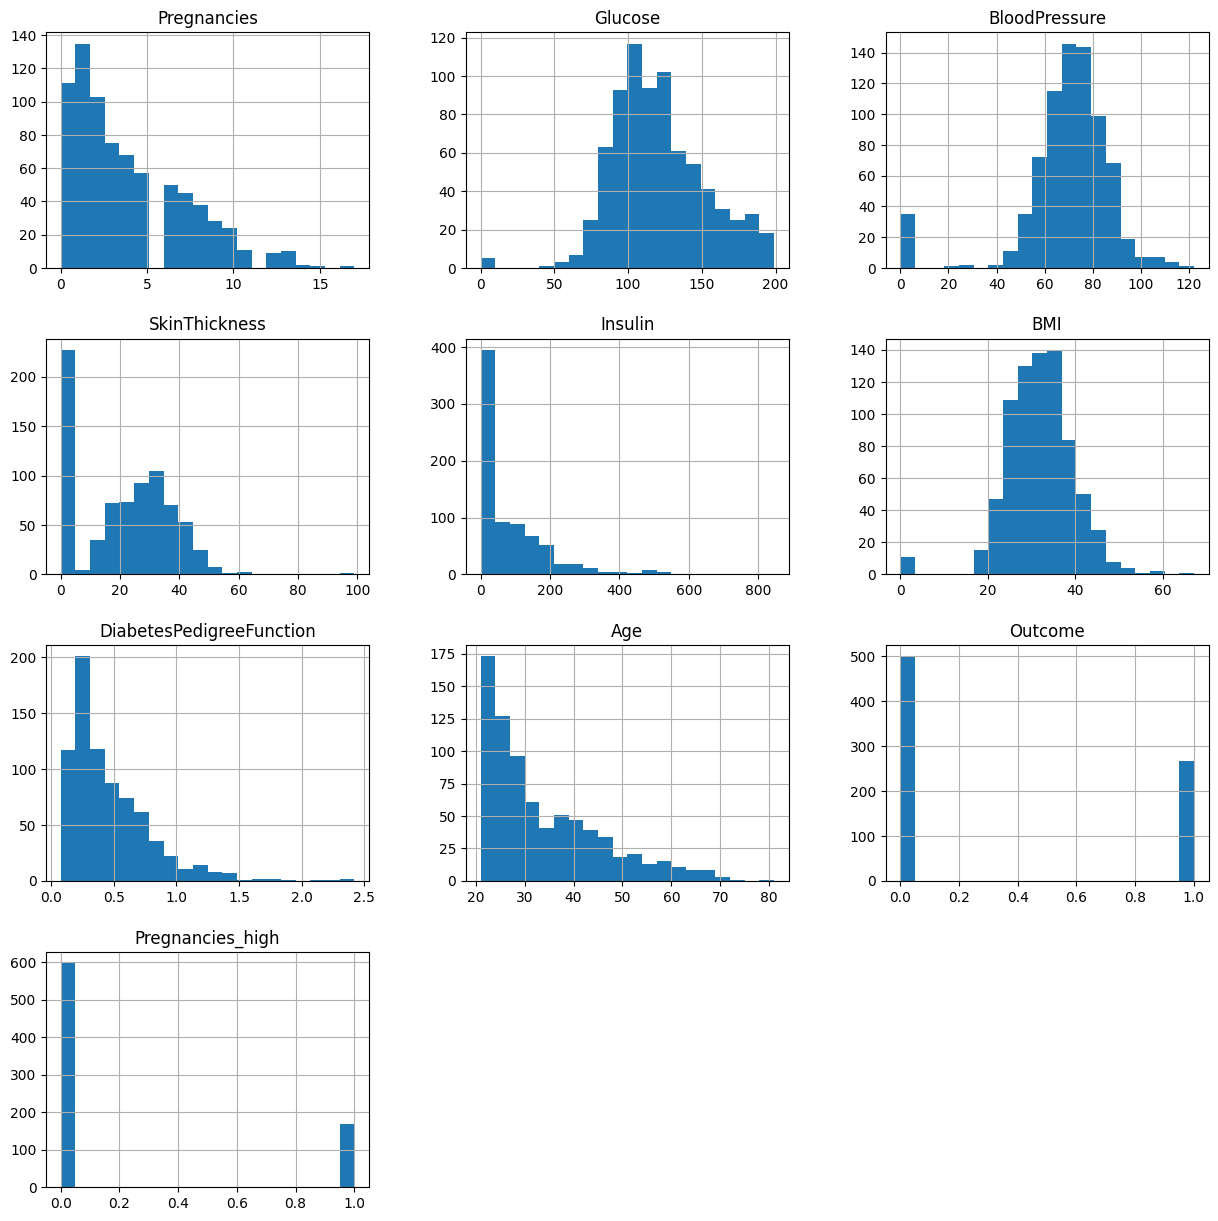

In [78]:
# distplot은 밀도함수와 커널추정함수를 같이 그려줌
# subplot은 범주형 column을 시각화할 때 사용한다
# histplot을 그려줄 때는 수치형만 있어야함 bool -> int
# bins = 옵션은 bar 갯수 추가
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15,15), bins=20)

C:\Users\beoms\AppData\Local\Temp\ipykernel_3128\1989565566.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Outcome"], ax=axes[0][0])


<Axes: xlabel='Outcome', ylabel='Density'>

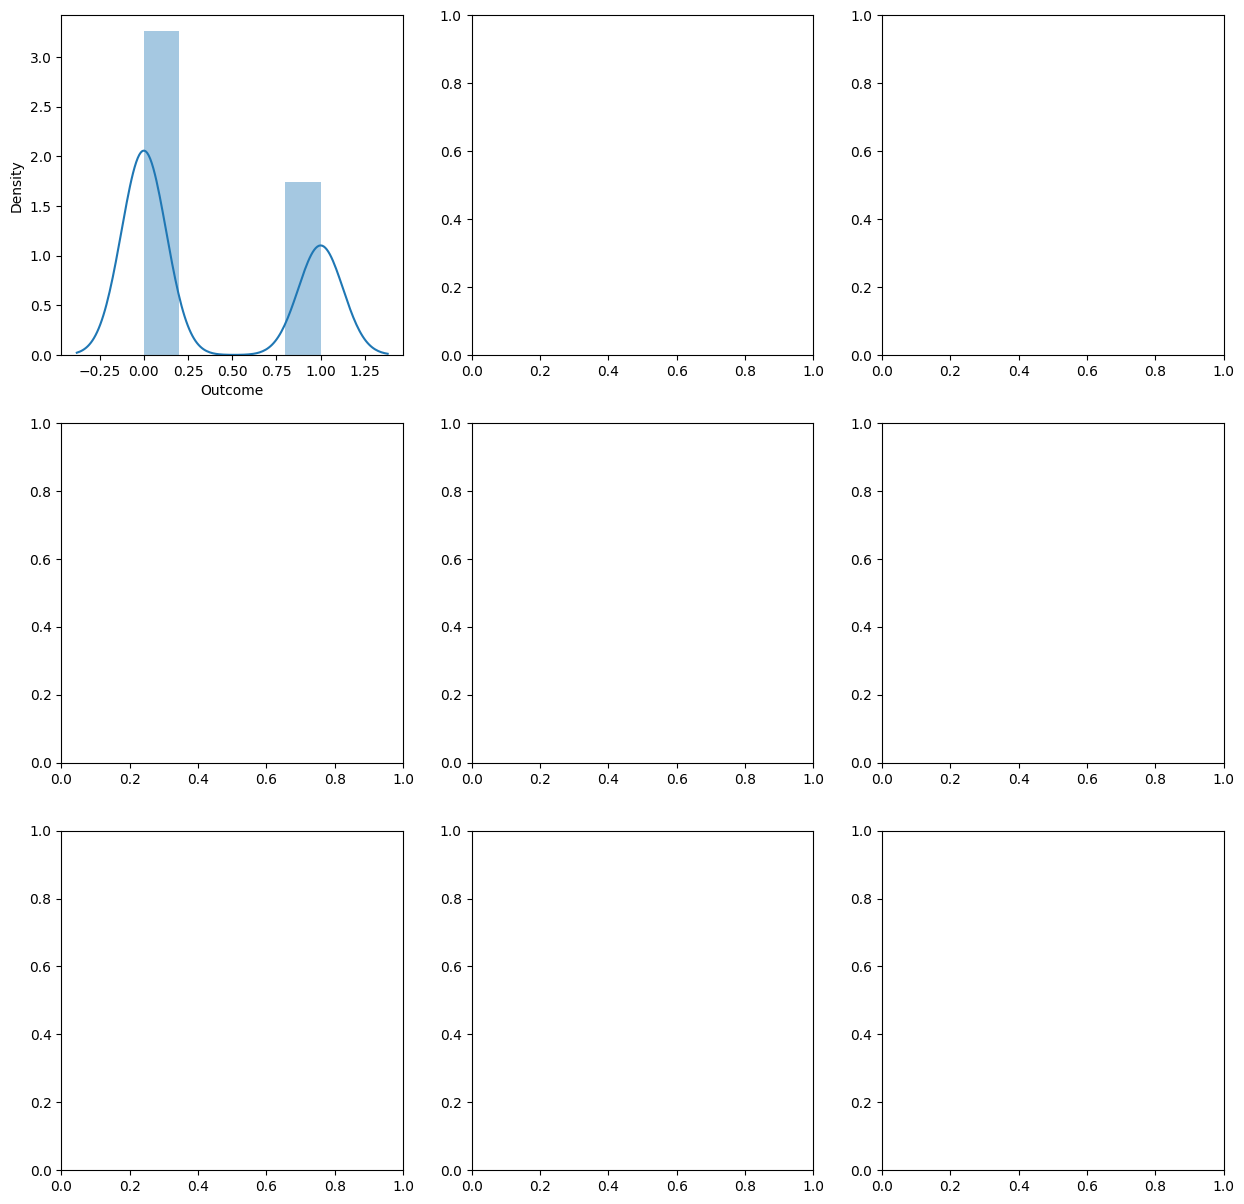

In [83]:

# ax= 옵션으로 어디에 플롯이 들어갈지 설정가능
sns.distplot(df["Outcome"], ax=axes[0][0])

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col])

C:\Users\beoms\AppData\Local\Temp\ipykernel_3128\2741633085.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
C:\Users\beoms\AppData\Local\Temp\ipykernel_3128\2741633085.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])
C:

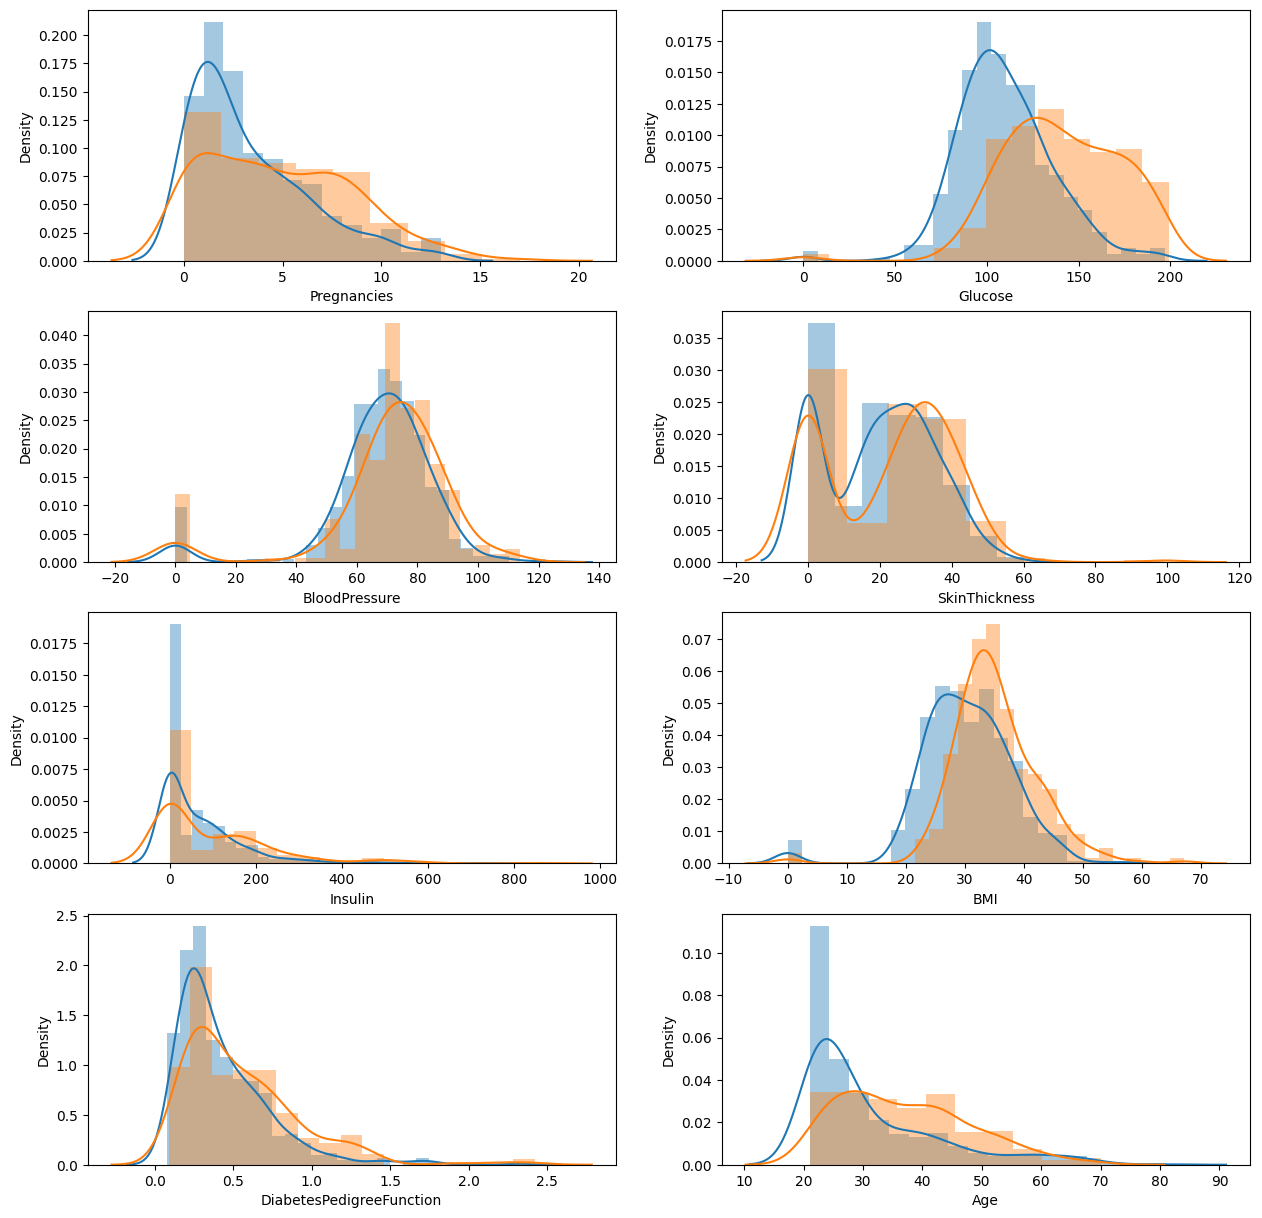

In [93]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])
